In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/GENAI/Week3/Day3/Airplane Crashes and Fatalities upto 2023.zip"

Archive:  /content/drive/MyDrive/GENAI/Week3/Day3/Airplane Crashes and Fatalities upto 2023.zip
  inflating: Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# **1. Data Import and Cleaning:**

In [198]:
file = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin-1')
df = pd.DataFrame(file)
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [199]:
df.drop_duplicates(inplace=True)

In [200]:
df.shape[0]

4998

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [202]:
df.describe()

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4980.000000,4769.000000,4772.000000,4990.000000,4756.000000,4757.000000,4956.000000
mean,31.195984,27.009017,4.479254,22.373547,19.053827,3.578516,1.719128
std,45.534788,44.111609,3.483859,35.061741,34.146127,3.167922,55.540273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000


In [203]:
df.isna().mean() * 100

,0
Date,0.000000
Time,30.252101
Location,0.080032
Operator,0.200080
Flight #,73.409364
Route,15.546218
AC Type,0.300120
Registration,5.482193
cn/ln,13.365346
Aboard,0.360144


On supprime ces colonnes car elles comportent trop de valeurs manquantes (>10%) ou ne sont pas utiles pour notre analyse.

In [204]:
df.drop(columns=["Flight #", "Route", "cn/ln", "Registration"], inplace=True)

In [205]:
df.isna().mean() * 100

,0
Date,0.000000
Time,30.252101
Location,0.080032
Operator,0.200080
AC Type,0.300120
Aboard,0.360144
Aboard Passangers,4.581833
Aboard Crew,4.521809
Fatalities,0.160064
Fatalities Passangers,4.841937


In [206]:
from sklearn.impute import SimpleImputer

Se = SimpleImputer(strategy='most_frequent')
df["Location"] = Se.fit_transform(df[["Location"]]).ravel()
df["Operator"] = Se.fit_transform(df[["Operator"]]).ravel()
df["AC Type"] = Se.fit_transform(df[["AC Type"]]).ravel()

In [207]:
Se2 = SimpleImputer(strategy='mean')
df["Aboard Passangers"] = np.round(Se2.fit_transform(df[["Aboard Passangers"]])).ravel()
df["Aboard Crew"] = np.round(Se2.fit_transform(df[["Aboard Crew"]])).ravel()
df["Fatalities Passangers"] = np.round(Se2.fit_transform(df[["Fatalities Passangers"]])).ravel()
df["Fatalities Crew"] = np.round(Se2.fit_transform(df[["Fatalities Crew"]])).ravel()
df["Ground"] = np.round(Se2.fit_transform(df[["Ground"]])).ravel()

In [208]:
df["Aboard"] = df["Aboard Passangers"] + df["Aboard Crew"]
df["Fatalities"] = df["Fatalities Passangers"] + df["Fatalities Crew"]

In [209]:
df.dropna(inplace=True)

In [210]:
df.isna().mean() * 100

,0
Date,0.0
Time,0.0
Location,0.0
Operator,0.0
AC Type,0.0
Aboard,0.0
Aboard Passangers,0.0
Aboard Crew,0.0
Fatalities,0.0
Fatalities Passangers,0.0


In [211]:
df["Date"] = pd.to_datetime(df["Date"])

In [212]:
df.head()

,Date,Time,Location,Operator,AC Type,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
2,1912-07-12,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),31.0,27.0,4.0,23.0,19.0,4.0,0.0,The airship flew into a thunderstorm and encou...
5,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),31.0,27.0,4.0,23.0,19.0,4.0,0.0,Hydrogen gas which was being vented was sucked...
6,1915-03-05,1:00,"Tienen, Belgium",Military - German Navy,Zeppelin L-8 (airship),31.0,27.0,4.0,23.0,19.0,4.0,0.0,Crashed into trees while attempting to land af...


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3482 entries, 0 to 4997
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   3482 non-null   datetime64[ns]
 1   Time                   3482 non-null   object        
 2   Location               3482 non-null   object        
 3   Operator               3482 non-null   object        
 4   AC Type                3482 non-null   object        
 5   Aboard                 3482 non-null   float64       
 6   Aboard Passangers      3482 non-null   float64       
 7   Aboard Crew            3482 non-null   float64       
 8   Fatalities             3482 non-null   float64       
 9   Fatalities Passangers  3482 non-null   float64       
 10  Fatalities Crew        3482 non-null   float64       
 11  Ground                 3482 non-null   float64       
 12  Summary                3482 non-null   object        
dtypes: datet

In [214]:
df.shape[0]

3482

# **2. Exploratory Data Analysis:**

Number of crashes


In [215]:
number_flights = df.shape[0]
number_flights

3482

number of fatalities

In [216]:
number_fatalities = df["Fatalities"].sum()
number_fatalities

np.float64(94162.0)

survival rates

In [217]:
number_survivors = df["Aboard"].sum() - df["Fatalities"].sum()
survival_rate = number_survivors / df["Aboard"].sum() * 100
survival_rate

np.float64(27.850739406941997)

In [236]:
crashes_per_year = df.groupby(df["Date"].dt.year)["Date"].count()

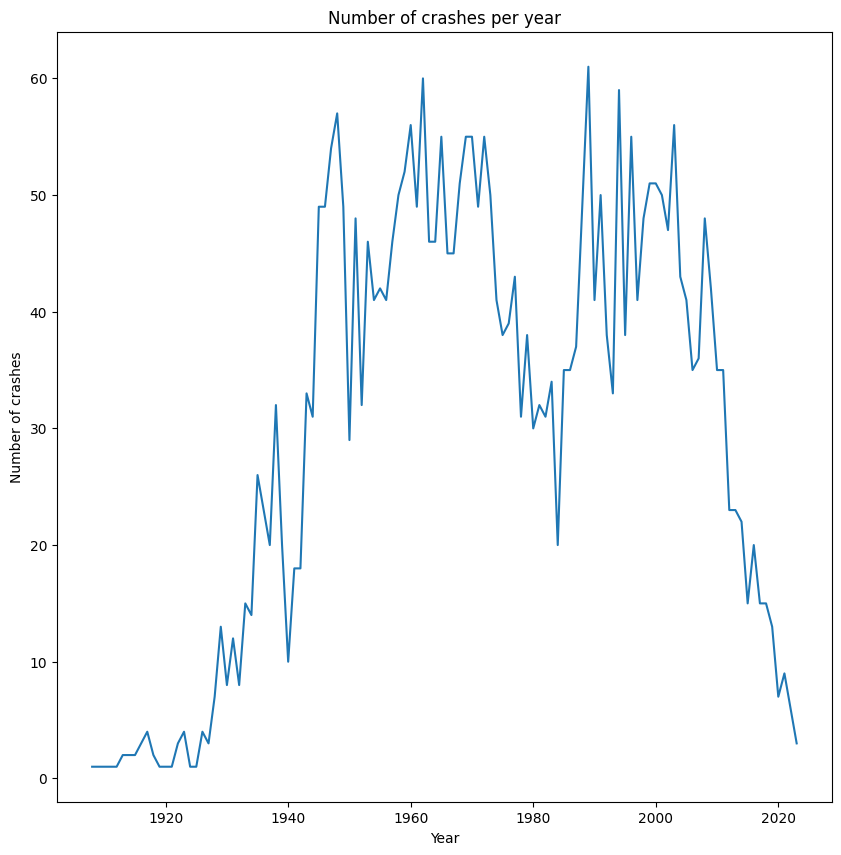

In [219]:
plt.figure(figsize=(10, 10))
plt.plot(crashes_per_year)
plt.title("Number of crashes per year")
plt.xlabel("Year")
plt.ylabel("Number of crashes")
plt.show()

# **3. Statistical Analysis:**

In [220]:
fatalities_mean = stats.tmean(df["Fatalities"])
fatalities_median = np.median(df["Fatalities"])
fatalities_std = stats.tstd(df["Fatalities"])

print(f"Mean: {fatalities_mean}")
print(f"Median: {fatalities_median}")
print(f"Standard deviation: {fatalities_std}")

Mean: 27.04250430786904
Median: 14.0
Standard deviation: 40.09522459285542


In [221]:
df.dropna(inplace=True)

In [222]:
df["Survival Rate"] = (df["Aboard"] - df["Fatalities"]) / df["Aboard"] * 100

In [225]:
df = df[df["Survival Rate"] >= 0]

In [226]:
survival_mean = stats.tmean(df["Survival Rate"])
survival_median = np.median(df["Survival Rate"])
survival_std = stats.tstd(df["Survival Rate"])

print(f"Mean: {survival_mean}")
print(f"Median: {survival_median}")
print(f"Standard deviation: {survival_std}")

Mean: 18.608632526488496
Median: 0.0
Standard deviation: 31.17620834175657


In [227]:
df["Decade"] = (df["Date"].dt.year // 10) * 10

In [240]:
groups = [group["Fatalities"] for i, group in df.groupby("Decade") if len(group) > 1]

In [241]:
from scipy.stats import f_oneway

stat, p = f_oneway(*groups)

if p < 0.05:
    print("There is a significant difference in the number of fatalities between the decades.")
else:
    print("There is no significant difference in the number of fatalities between the decades.")

There is a significant difference in the number of fatalities between the decades.


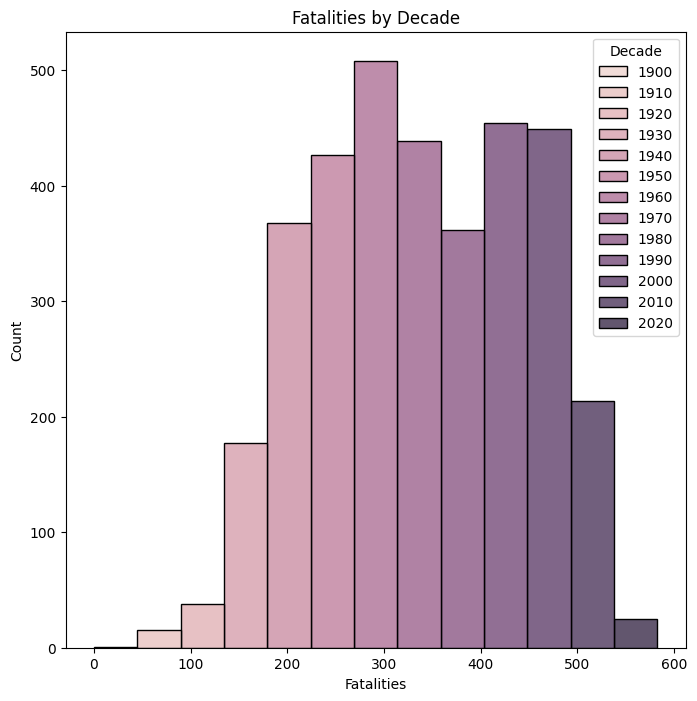

In [275]:
plt.figure(figsize=(8, 8))
sns.histplot(data = df, x = "Fatalities", hue = "Decade", multiple="dodge", bins = 1)
plt.title("Fatalities by Decade")
plt.xlabel("Fatalities")
plt.show()

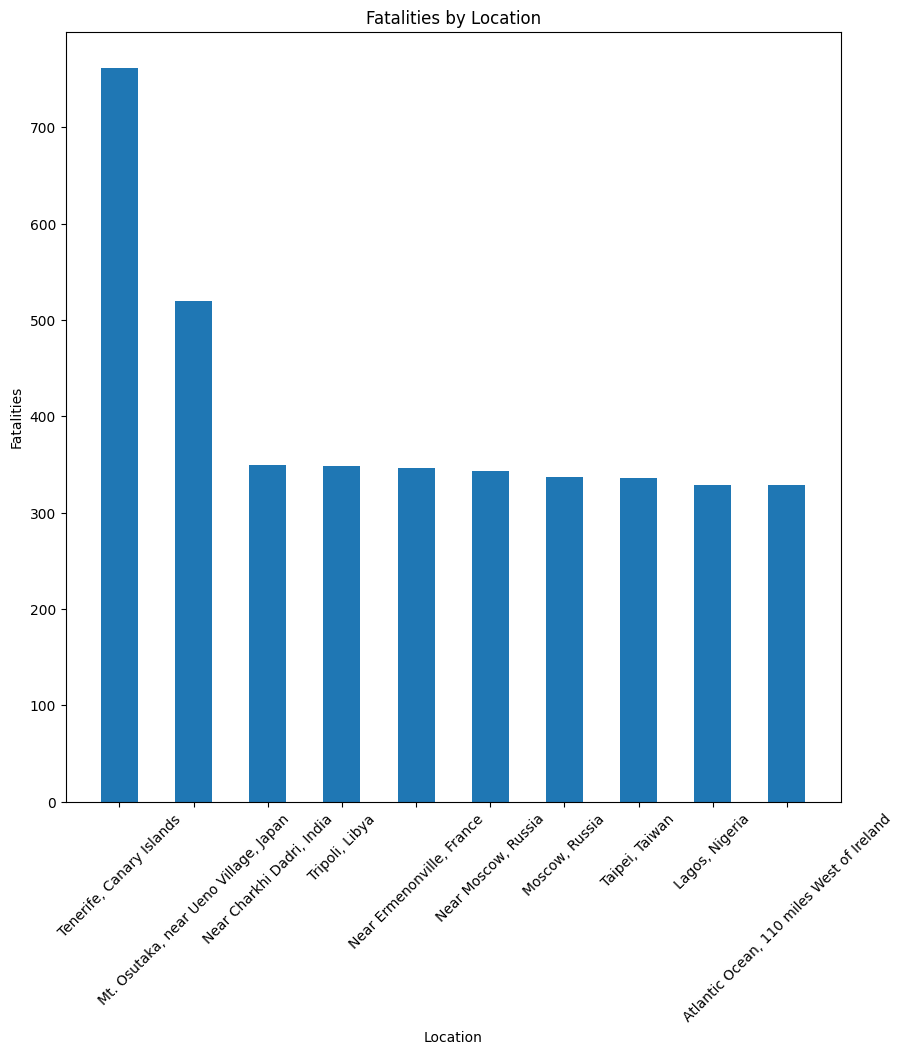

In [281]:
decade_df = df.groupby("Location")["Fatalities"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 10))
plt.bar(decade_df.index, decade_df.values, width = 0.5)
plt.title("Fatalities by Location")
plt.xlabel("Location")
plt.ylabel("Fatalities")
plt.xticks(rotation=45)
plt.show()

# **5. Insight and Report:**

The analysis reveals strong historical trends, a progressive improvement in aviation safety, and a marked variability in the severity of accidents.